<a href="https://colab.research.google.com/github/anshugupta742/data-analytics-projects/blob/main/CO2-Emission-Analysis/CO2_Emission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CustomersData.xlsx to CustomersData.xlsx
Saving Discount_Coupon.csv to Discount_Coupon.csv
Saving Marketing_Spend.csv to Marketing_Spend.csv
Saving Online_Sales.csv to Online_Sales.csv
Saving Tax_amount.xlsx to Tax_amount.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Discount_Coupon = pd.read_csv("Discount_Coupon.csv")
Marketing_Spend = pd.read_csv("Marketing_Spend.csv")
Online_Sales = pd.read_csv("Online_Sales.csv")
CustomersData = pd.read_excel("CustomersData.xlsx")
Tax_amount = pd.read_excel("Tax_amount.xlsx")

In [ ]:
#To calculate Revenue column

Online_Sales['Month'] = pd.to_datetime(Online_Sales['Transaction_Date'], format='%m/%d/%Y').dt.month

Discount_Coupon['Month'] = Discount_Coupon['Month'].astype(str).str.strip()

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
Discount_Coupon['Month'] = Discount_Coupon['Month'].map(month_mapping)

sales_gst = pd.merge(Online_Sales, Tax_amount, on='Product_Category', how='left')

sales_with_revenue = pd.merge(sales_gst, Discount_Coupon, on=['Month', 'Product_Category'], how='left')

sales_with_revenue['Discount_pct'] = sales_with_revenue['Discount_pct'].fillna(0)

sales_with_revenue['Revenue'] = (((sales_with_revenue['Quantity'] * sales_with_revenue['Avg_Price'])
 * (1 - (sales_with_revenue['Discount_pct'])/100) * (1 + sales_with_revenue['GST'])) + sales_with_revenue['Delivery_Charges'])

***1) Identify the months with the highest and lowest customer acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?***

In [ ]:
df_year = Online_Sales.groupby('CustomerID')[['Transaction_Date']].min()
df_year['Month'] = pd.to_datetime(df_year['Transaction_Date'], format='%m/%d/%Y').dt.month
acquisition_df = df_year.groupby('Month').count().reset_index()
acquisition_df.columns = ['Month','Customer_acquisition']
print(acquisition_df)

    Month  Customer_acquisition
0       1                   215
1       2                    63
2       3                   135
3       4                   131
4       5                    81
5       6                   104
6       7                    72
7       8                   107
8       9                    69
9      10                   182
10     11                   145
11     12                   164


In [ ]:
max_acq = acquisition_df.loc[acquisition_df['Customer_acquisition'].idxmax()]
min_acq = acquisition_df.loc[acquisition_df['Customer_acquisition'].idxmin()]
print('Month: ', max_acq['Month'], 'has highest acquisition : ', max_acq['Customer_acquisition'])
print('Month: ', min_acq['Month'], 'has lowest acquisition : ', min_acq['Customer_acquisition'])

Month:  1 has highest acquisition :  215
Month:  2 has lowest acquisition :  63


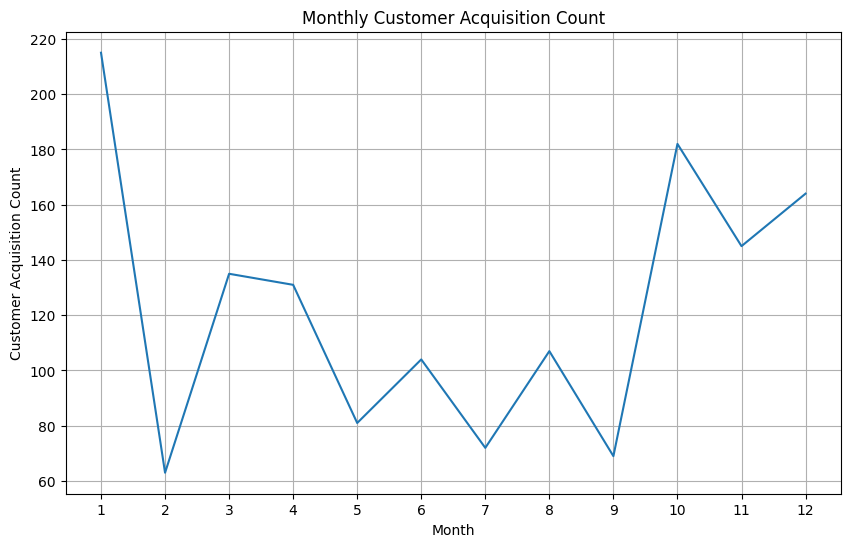

In [ ]:
monthly_acquisition = df_year.groupby('Month').count()
monthly_acquisition = monthly_acquisition.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_acquisition, x='Month', y='Transaction_Date')
plt.xlabel('Month')
plt.ylabel('Customer Acquisition Count')
plt.title('Monthly Customer Acquisition Count')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

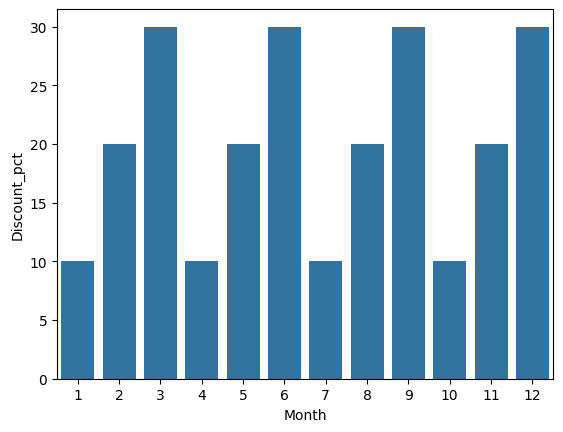

In [ ]:
df2 = Discount_Coupon.groupby(['Month','Discount_pct'])['Coupon_Code'].count().reset_index()
sns.barplot(data=df2, x='Month', y='Discount_pct')
plt.show()

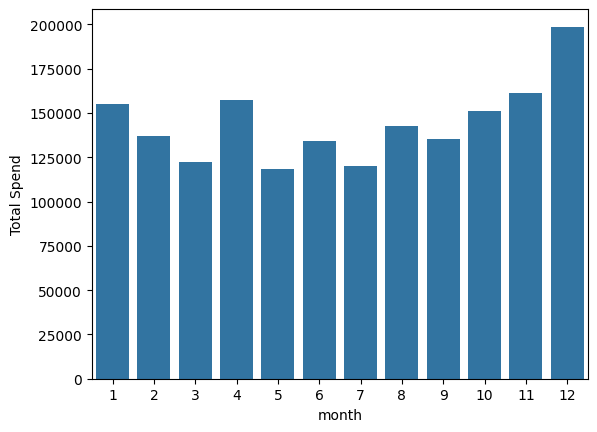

In [ ]:
Marketing_Spend['month']=pd.to_datetime(Marketing_Spend['Date'], format='%m/%d/%Y').dt.month
df = Marketing_Spend.groupby('month')[['Offline_Spend','Online_Spend']].sum()
df['Total'] = df[['Offline_Spend','Online_Spend']].sum(axis=1)
df.reset_index()
sns.barplot(data=df, x='month', y='Total')
plt.ylabel('Total Spend')
plt.show()

**Strategies:**

*   **Address low acquisition months (February, May, July, September):** These months show lower customer acquisition. Consider implementing targeted campaigns during these times, perhaps focusing on specific customer segments or product categories. Promotional strategies like discount percent, marketing spend, or loyalty programs could help boost acquisition.
*   **Optimize discount coupon strategy:** The current discount coupon strategy seems to have a consistent number of coupons offered each month, but the discount percentages vary. Analyze which discount percentages and product categories perform best in different months and adjust the strategy accordingly. Consider offering higher discounts during low acquisition months or for specific product categories that need a boost.





***2. Analyze the data to determine if certain months consistently show higher or lower acquisition. How can the company capitalize on high-performing months and improve performance during slower periods?***


**Capitalizing on high-performing months (e.g., January, October, December):**

*   Intensify marketing efforts: Allocate a larger portion of the marketing budget to these months, focusing on channels that have proven most effective.
*   Introduce loyalty programs: Reward existing customers for their continued business and encourage repeat purchases during peak seasons.


*   Leverage successful campaigns: Analyze what worked well in previous high-performing months and replicate or scale those strategies.

**Improving performance during slower periods (e.g., February, May, July, September):**

*   Targeted promotions and discounts: Offer attractive deals and discounts during these months to incentivize purchases. Analyze the effectiveness of different discount percentages and product categories to tailor offers.
*   Explore new marketing channels: Experiment with different advertising platforms or strategies to reach new customer segments.



***3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?***


In [ ]:
sales_with_revenue['Transaction_Date'] = pd.to_datetime(
    sales_with_revenue['Transaction_Date'], format='%m/%d/%Y'
)
df_year2 = sales_with_revenue.copy()

acquisition_month = sales_with_revenue.groupby('CustomerID')['Transaction_Date'].min().dt.month.reset_index()
acquisition_month.columns = ['CustomerID','Acquisition_month']
acq_and_real_month = pd.merge(df_year2,acquisition_month,on='CustomerID')

cohort_size = acq_and_real_month.groupby('Acquisition_month')['CustomerID'].nunique().reset_index()
cohort_size.columns = ['Acquisition_month', 'Cohort_Size']

retained_counts = acq_and_real_month[
    acq_and_real_month['Month'] == acq_and_real_month['Acquisition_month'] + 1
    ].groupby('Acquisition_month')['CustomerID'].nunique().reset_index()
retained_counts.columns = ['Acquisition_month', 'Retained_Count']

retention_next_month = pd.merge(cohort_size, retained_counts, on='Acquisition_month', how='left').fillna(0)
retention_next_month['Retention_Rate_Next_Month'] = (retention_next_month['Retained_Count'] / retention_next_month['Cohort_Size'])

print("Retention Rate in the next month for each cohort:")
print(retention_next_month[['Acquisition_month', 'Retention_Rate_Next_Month']])

Retention Rate in the next month for each cohort:
    Acquisition_month  Retention_Rate_Next_Month
0                   1                   0.060465
1                   2                   0.072917
2                   3                   0.101695
3                   4                   0.085890
4                   5                   0.107143
5                   6                   0.145985
6                   7                   0.138298
7                   8                   0.103704
8                   9                   0.076923
9                  10                   0.068966
10                 11                   0.102941
11                 12                   0.000000


In [ ]:
max_retention = retention_next_month.loc[retention_next_month['Retention_Rate_Next_Month'].idxmax()]
min_retention = retention_next_month.loc[retention_next_month['Retention_Rate_Next_Month'].idxmin()]
print('Month: ', max_retention['Acquisition_month'] , 'has maximum retention: ',max_retention['Retention_Rate_Next_Month'])
print('Month: ', min_retention['Acquisition_month'] , 'has minimum retention: ',min_retention['Retention_Rate_Next_Month'])

Month:  6.0 has maximum retention:  0.145985401459854
Month:  12.0 has minimum retention:  0.0


**Strategies to improve retention for weaker cohorts:**
*   **Targeted re-engagement:** Use specific campaigns to reconnect with inactive customers from these cohorts.
*   **Incentivize repeat purchases:** Offer targeted discounts or loyalty rewards.



***4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.***

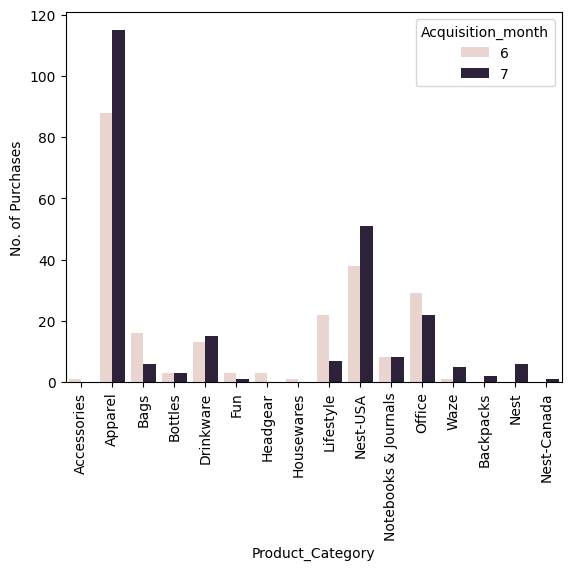

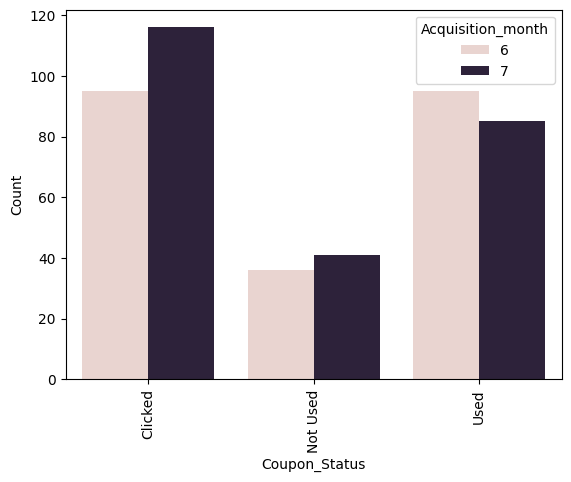

In [ ]:
high_retention_cohorts = acq_and_real_month[
    acq_and_real_month['Acquisition_month'].isin([6, 7])
].copy()

high_retention_purchases = high_retention_cohorts[
    high_retention_cohorts['Month'] == high_retention_cohorts['Acquisition_month'] + 1
].copy()

high_retention_byCategory = high_retention_purchases.groupby(['Acquisition_month','Product_Category'])['CustomerID'].count().reset_index()
high_retention_byCategory.columns= ['Acquisition_month','Product_Category','Count']
sns.barplot(high_retention_byCategory, x='Product_Category', y='Count', hue='Acquisition_month')
plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.show()

high_retention_byCouponUsed = high_retention_purchases.groupby(['Acquisition_month','Coupon_Status'])['CustomerID'].count().reset_index()
high_retention_byCouponUsed.columns= ['Acquisition_month','Coupon_Status','Count']
sns.barplot(high_retention_byCouponUsed, x='Coupon_Status', y='Count', hue='Acquisition_month')
plt.xticks(rotation=90)
plt.show()

**Strategies:**
*   **Promote High-Performing Product Categories:** The analysis showed which product categories were popular during June and July. Identify these categories and promote them more heavily in other months, especially in those with lower retention.
*   **Optimize Coupon Strategies:** Examine the coupon usage during June and July. If certain types of coupons or discount percentages were particularly effective in driving purchases and contributing to retention, consider replicating those strategies in other months.




***5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?***

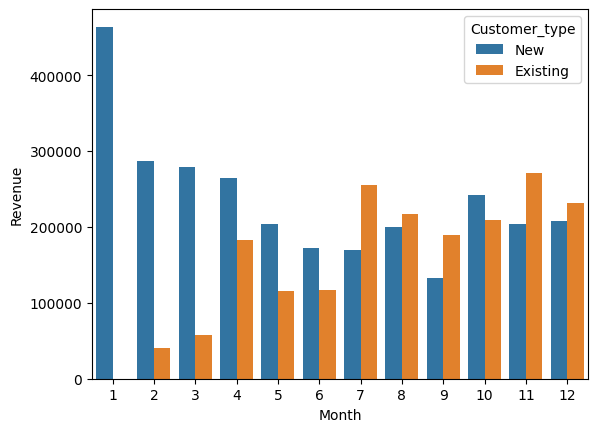

In [ ]:
df3 = sales_with_revenue.copy()
first_purchase = df3.groupby('CustomerID')['Month'].min().reset_index()
first_purchase = first_purchase.rename(columns={'Month':'First_Month'})
df3 = pd.merge(df3,first_purchase, on='CustomerID')
df3['Customer_type'] = df3[['Month','First_Month']].apply(lambda x: 'New' if x['Month']==x['First_Month'] else 'Existing', axis=1)
revenue_trend = df3.groupby(['Month', 'Customer_type'])['Revenue'].sum().reset_index()
sns.barplot(data=revenue_trend, x='Month', y='Revenue', hue='Customer_type')
plt.show()

This trend suggests that the company is successful in acquiring new customers, especially at the beginning of the year. However, the increasing revenue from existing customers over time indicates strong customer retention

***6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?***


<Axes: xlabel='Coupon_Status_Revised', ylabel='Revenue'>

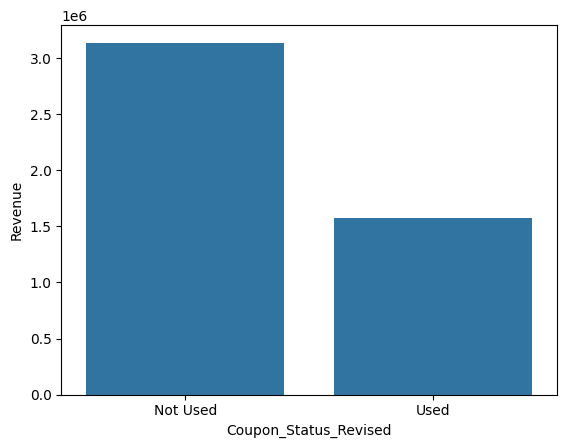

In [ ]:
df3['Coupon_Status_Revised'] = df3['Coupon_Status'].apply(lambda x: 'Not Used' if x in ['Clicked', 'Not Used'] else 'Used')
coupon_used_revenue = df3.groupby('Coupon_Status_Revised')['Revenue'].sum().reset_index()
sns.barplot(data=coupon_used_revenue, x='Coupon_Status_Revised', y='Revenue')



**To optimize discount strategies for maximizing revenue while maintaining profitability:**

*   **Targeted Discounts:** Instead of broad discounts, target specific customer segments or product categories where discounts are more likely to drive incremental sales without significantly impacting profitability.
*   **Conditional Discounts:** Offer discounts based on certain conditions, such as minimum purchase value or purchase of specific product bundles. This encourages customers to spend more to avail the discount.
*   **Analyze Discount Impact on Specific Products:** Analyze the impact of discounts on individual product categories or high-margin products to understand where discounts are most and least effective.










***7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?***

In [ ]:
quantity_df = df3.groupby('Product_SKU')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
revenue_df = df3.groupby('Product_SKU')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False)
print(quantity_df)
print(revenue_df)

         Product_SKU  Quantity
914   GGOEGGOA017399     16234
880   GGOEGDHC018299      9728
854   GGOEGBMJ013399      7321
969   GGOEGOLC014299      6496
904   GGOEGFKQ020399      5847
...              ...       ...
1056  GGOEYAEB030014         1
1118  GGOEYAXB089629         1
1119  GGOEYAXB089630         1
1084  GGOEYAEJ029616         1
1114  GGOEYAWQ089753         1

[1145 rows x 2 columns]
         Product_SKU       Revenue
981   GGOENEBJ079499  633770.95210
983   GGOENEBQ078999  578973.57080
976   GGOENEBB078899  490219.16470
984   GGOENEBQ079099  198503.43240
985   GGOENEBQ079199  195517.18510
...              ...           ...
1084  GGOEYAEJ029616      16.07838
799   GGOEGAXR066029      16.03472
955   GGOEGOCC017699       9.46500
730   GGOEGAWH062048       9.36622
913   GGOEGGCX092599       7.48965

[1145 rows x 2 columns]


# ***Inventory Management:***


*   **Prioritize Stock**: The top products by quantity and revenue should be prioritized in inventory. Ensure sufficient stock levels to meet demand and avoid stockouts, which can lead to lost sales and customer dissatisfaction.
*   **Forecast Demand:** Use the sales data of top products to improve demand forecasting. This can help in optimizing inventory levels and reducing holding costs.

# ***Promotional Strategies:***

*   **Highlight Popular Products:** Feature top-performing products prominently in marketing campaigns, on the website, and in stores.
*   **Analyze Product Descriptions:** Examine the product descriptions and marketing materials of successful products to identify effective messaging and positioning. Apply these insights to other products.
*   **Targeted Promotions:** Run targeted promotions on top products or categories that have high potential for growth.
*   **Leverage Customer Reviews:** Encourage customer reviews for top products and use positive reviews as social proof in marketing.













***8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?***


<Axes: xlabel='Month', ylabel='ROI'>

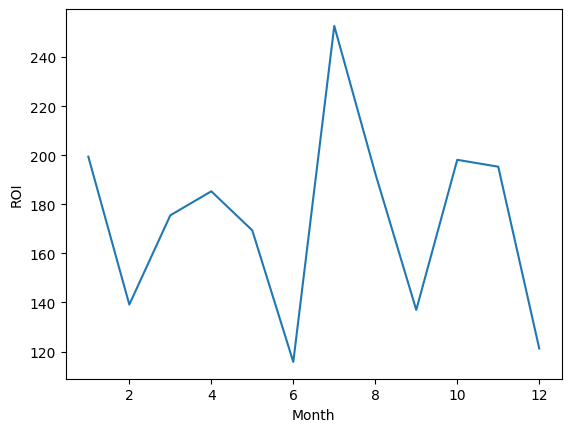

In [ ]:
df4 = Marketing_Spend.copy()
df4['Total_expenditure'] = df4[['Offline_Spend','Online_Spend']].apply(lambda x : x['Offline_Spend']+x['Online_Spend'], axis=1)
df4['Month'] = pd.to_datetime(Marketing_Spend['Date'], format='%m/%d/%Y').dt.month
total_exp_df = df4.groupby('Month')['Total_expenditure'].sum().reset_index()
df5 = df3.copy()
rev_df = df5.groupby('Month')['Revenue'].sum().reset_index()
merged = pd.merge(total_exp_df,rev_df,on='Month')
merged['ROI'] = merged[
    ['Total_expenditure','Revenue']].apply(lambda x : ( x['Revenue'] - x['Total_expenditure']) *100  / (x['Total_expenditure']), axis=1)
sns.lineplot(data=merged, x='Month', y='ROI')

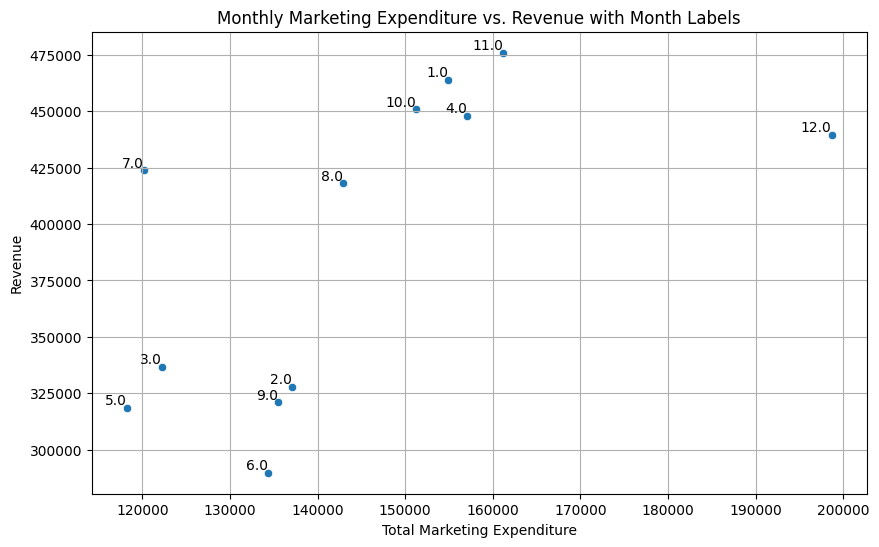

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Total_expenditure', y='Revenue')

for i, row in merged.iterrows():
    plt.text(row['Total_expenditure'], row['Revenue'], row['Month'], ha='right', va='bottom')

plt.xlabel('Total Marketing Expenditure')
plt.ylabel('Revenue')
plt.title('Monthly Marketing Expenditure vs. Revenue with Month Labels')
plt.grid(True)
plt.show()

# **Here are some strategies to adjust marketing efforts to improve ROI:**



*   **Analyze and replicate successful strategies from high-ROI months (July, November, October):** Examine the specific marketing channels, campaigns, and offers used during these months. Identify what worked well and explore how these successful strategies can be replicated or scaled in other months, especially those with lower efficiency.
*   **Re-evaluate and adjust strategies in low-ROI months (June, February, September):** Analyze the marketing activities in these months to understand why they were less effective. Consider shifting budget away from underperforming channels or campaigns, testing new approaches, or focusing on different customer segments or product categories during these periods.






***9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?***

In [ ]:
merged['Marketing_spend_%'] = merged[['Total_expenditure','Revenue']].apply(lambda x : x['Total_expenditure']*100 / x['Revenue'], axis=1)
print(merged)

    Month  Total_expenditure       Revenue         ROI  Marketing_spend_%
0       1          154928.95  463883.05705  199.416640          33.398277
1       2          137107.92  327896.56020  139.152166          41.814382
2       3          122250.09  336805.20383  175.505076          36.296972
3       4          157026.83  447999.19523  185.301050          35.050695
4       5          118259.64  318556.30056  169.370261          37.123623
5       6          134318.14  289830.32931  115.778993          46.343714
6       7          120217.85  423982.34361  252.678361          28.354447
7       8          142904.15  418160.56704  192.616112          34.174468
8       9          135514.54  321128.35638  136.969669          42.199494
9      10          151224.65  450837.46255  198.124322          33.543053
10     11          161144.96  475902.15336  195.325497          33.860944
11     12          198648.75  439530.03015  121.259902          45.195717


<Axes: xlabel='Month', ylabel='Marketing_spend_%'>

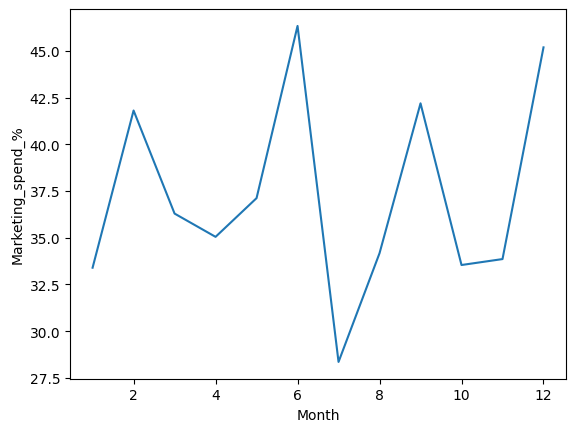

In [ ]:
sns.lineplot(data=merged, x='Month', y='Marketing_spend_%')

# These insights highlight opportunities to reallocate resources for better results:

**Increase investment in high-efficiency months:** Allocate a larger portion of the marketing budget to months that consistently show high ROI and lower marketing spend percentage (e.g., July, November, October). Analyze the specific campaigns, channels, and discounts used during these successful periods and replicate or scale them.
**Reduce or optimize spending in low-efficiency months:** Re-evaluate the marketing strategies and budget allocation in months with lower ROI and higher marketing spend percentage (e.g., June, February, September). Consider shifting budget away from underperforming channels or campaigns, testing new approaches, or focusing on more cost-effective strategies during these periods.

***10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)***


In [ ]:
today = sales_with_revenue['Transaction_Date'].max()
for_rfm = sales_with_revenue.copy()

rfm_df = for_rfm.groupby('CustomerID').agg({
    'Transaction_Date': lambda x : (today-x.max()).days,
    'Transaction_ID': 'count',
    'Revenue': 'sum'
}).reset_index()
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

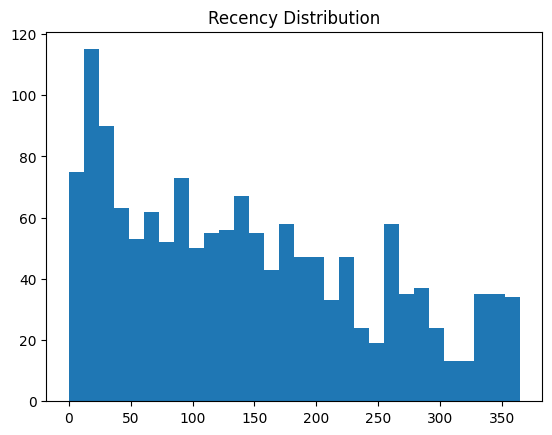

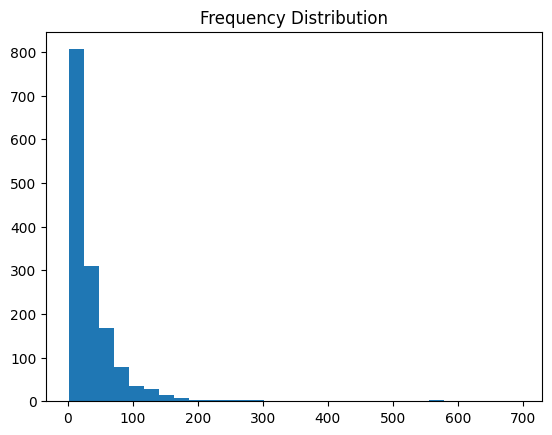

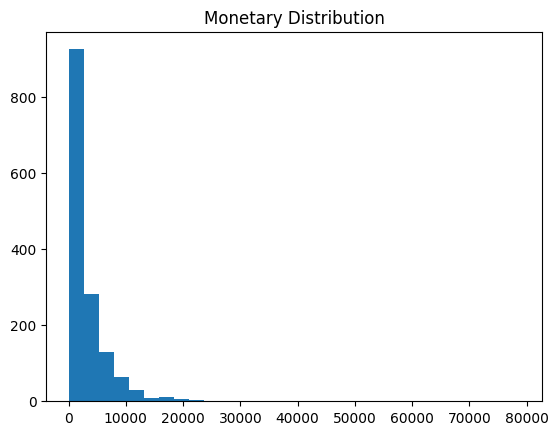

In [ ]:


plt.hist(rfm_df['Recency'], bins=30)
plt.title("Recency Distribution")
plt.show()

plt.hist(rfm_df['Frequency'], bins=30)
plt.title("Frequency Distribution")
plt.show()

plt.hist(rfm_df['Monetary'], bins=30)
plt.title("Monetary Distribution")
plt.show()


In [ ]:
r_bins = [0, 100, 200, 300, np.inf]
f_bins = [0, 5, 15, 50, np.inf]
m_bins = [0, 1000, 5000, 10000, np.inf]

rfm_df['R_score'] = pd.cut(rfm_df['Recency'], bins=r_bins, labels=False)+1
rfm_df['F_score'] = pd.cut(rfm_df['Frequency'], bins=f_bins, labels=False)+1
rfm_df['M_score'] = pd.cut(rfm_df['Monetary'], bins=m_bins, labels=False)+1

rfm_df['RFM_score'] = rfm_df['R_score'] + rfm_df['F_score'] + rfm_df['M_score']

def segment_customer(rfm_score):
    if rfm_score >= 8:
        return 'Premium'
    elif rfm_score >= 6:
        return 'Gold'
    elif rfm_score >= 4:
        return 'Silver'
    else:
        return 'Standard'

rfm_df['Segment'] = rfm_df['RFM_score'].apply(segment_customer)
print(rfm_df)

      CustomerID  Recency  Frequency     Monetary  R_score  F_score  M_score  \
0          12346      107          2    174.98174      2.0        1        1   
1          12347       59         60  12090.29580      1.0        4        4   
2          12348       73         23   1501.92620      1.0        3        2   
3          12350       17         17   1183.71394      1.0        3        2   
4          12356      107         36   1753.45086      2.0        3        2   
...          ...      ...        ...          ...      ...      ...      ...   
1463       18259      270          7    816.40980      3.0        2        1   
1464       18260       87         40   2647.24033      1.0        3        2   
1465       18269      194          8    155.66092      2.0        2        1   
1466       18277       69          1    301.02000      1.0        1        1   
1467       18283       82        102   6970.80527      1.0        4        3   

      RFM_score   Segment  
0          

**Targeted Strategies for Customer Segments:**

*   **Premium Segment (High RFM Score):**
    *   Focus on retaining these high-value customers through exclusive loyalty programs, early access to new products, personalized offers, and dedicated customer support.
    *   Encourage repeat purchases and higher spending through premium rewards and recognition.

*   **Gold Segment (Moderate to High RFM Score):**
    *   Develop strategies to move these customers towards the Premium segment by encouraging increased purchase frequency and monetary value.
    *   Offer tiered rewards, personalized recommendations, and product bundles to upsell and cross-sell.
    *   Use targeted email campaigns to highlight relevant promotions and new arrivals.

*   **Silver Segment (Lower Recency and Monetary, Moderate Frequency):**
    *   Focus on increasing the monetary value of their purchases through targeted promotions and discounts on higher-value products.
    *   Implement personalized offers to encourage larger basket sizes.
    *   Consider win-back campaigns for those whose recency is declining.

*   **Standard Segment (Low RFM Score):**
    *   Implement re-engagement campaigns with compelling introductory offers and discounts to encourage repeat purchases.
    *   Showcase popular and best-selling products to drive initial conversions.
    *   Utilize targeted advertising on relevant channels to reach this segment effectively.
    *   Gather feedback to understand their needs and preferences and identify opportunities for improvement.

***11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?***

In [ ]:
segment_revenue = rfm_df.groupby('Segment')['Monetary'].sum().reset_index()
print(segment_revenue)

    Segment      Monetary
0      Gold  1.311596e+06
1   Premium  3.126110e+06
2    Silver  2.028996e+05
3  Standard  7.390604e+04


**Focusing on High-Value Segments (Premium):**

*   **Prioritize resources:** Allocate a significant portion of marketing and customer service resources to the Premium segment. These customers contribute the most revenue and are likely to have a higher lifetime value.
*   **Enhance loyalty programs:** Continuously improve and personalize loyalty programs to keep Premium customers engaged and rewarded. Offer exclusive perks, early access, and dedicated support.
*   **Gather feedback:** Actively solicit feedback from Premium customers to understand their needs and preferences. Use this feedback to improve products, services, and overall customer experience.

**Nurturing Lower-Value Segments (Gold, Silver, Standard):**

*   **Gold Segment:**
    *   Implement strategies to encourage these customers to increase their purchase frequency and monetary value.
    *   Offer targeted promotions and product recommendations that align with their past behavior and potential interests.
    *   Provide incentives for referrals to acquire more customers similar to this segment.
*   **Silver Segment:**
    *   Focus on increasing the monetary value of their purchases through targeted discounts on higher-value items or product bundles.
    *   Implement win-back campaigns for those with declining recency to re-engage them.
*   **Standard Segment:**
    *   Focus on re-engagement and encouraging initial purchases through compelling introductory offers and highlighting popular products.
    *   Utilize cost-effective marketing channels to reach this segment and gather feedback to understand their needs and identify potential for growth.


***12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?***


Retention Matrix:
Cohort_Index   0         1         2         3         4         5         6   \
Cohort_Month                                                                    
1             1.0  0.060465  0.111628  0.158140  0.106977  0.204651  0.162791   
2             1.0  0.072917  0.093750  0.166667  0.177083  0.229167  0.197917   
3             1.0  0.101695  0.197740  0.141243  0.180791  0.186441  0.124294   
4             1.0  0.085890  0.147239  0.147239  0.110429  0.092025  0.061350   
5             1.0  0.107143  0.080357  0.116071  0.089286  0.116071  0.125000   
6             1.0  0.145985  0.160584  0.087591  0.080292  0.102190  0.080292   
7             1.0  0.138298  0.042553  0.063830  0.117021  0.095745       NaN   
8             1.0  0.103704  0.111111  0.074074  0.059259       NaN       NaN   
9             1.0  0.076923  0.038462  0.025641       NaN       NaN       NaN   
10            1.0  0.068966  0.045977       NaN       NaN       NaN       NaN   
11        

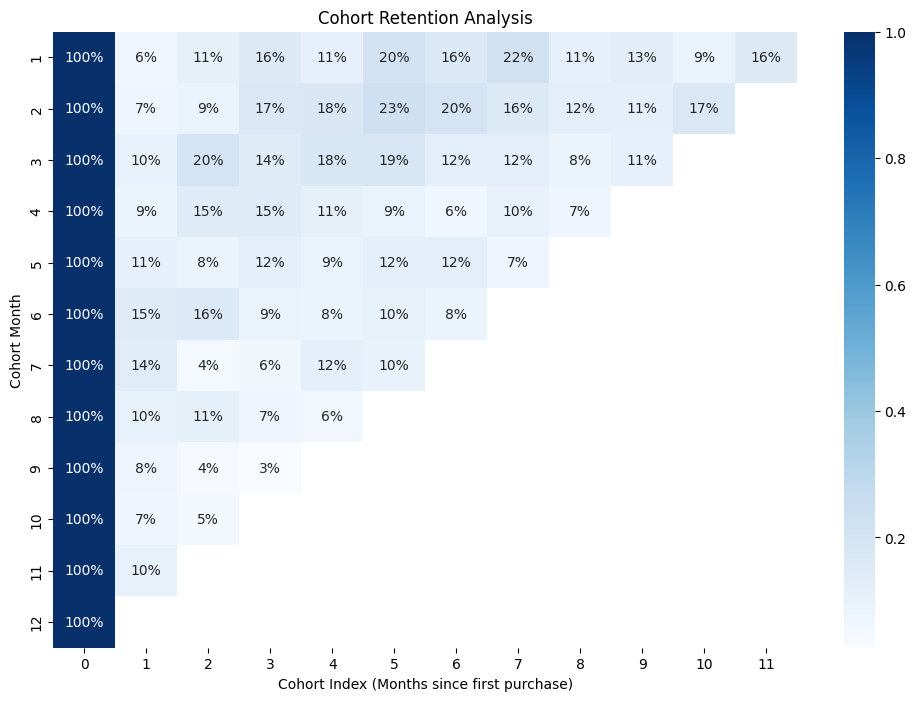

In [ ]:
first_purchase_month_df = sales_with_revenue.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase_month_df.columns = ['CustomerID', 'First_Purchase_Date']
first_purchase_month_df['Cohort_Month'] = first_purchase_month_df['First_Purchase_Date'].dt.month

df_cohort = pd.merge(sales_with_revenue, first_purchase_month_df[['CustomerID', 'Cohort_Month']], on='CustomerID')

df_cohort['Transaction_Month'] = df_cohort['Transaction_Date'].dt.month
df_cohort['Cohort_Index'] = (df_cohort['Transaction_Month'] - df_cohort['Cohort_Month'])

cohort_counts = df_cohort.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot_table(index='Cohort_Month', columns='Cohort_Index', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

print("Retention Matrix:")
print(retention_matrix)

retention_after_1_month = retention_matrix[1].dropna()

highest_retention_cohort = retention_after_1_month.idxmax()
lowest_retention_cohort = retention_after_1_month.idxmin()

print(f"\nCohort with highest retention after 1 month: {highest_retention_cohort} with a rate of {retention_after_1_month.max():.2f}")
print(f"Cohort with lowest retention after 1 month: {lowest_retention_cohort} with a rate of {retention_after_1_month.min():.2f}")

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Cohort Retention Analysis')
plt.xlabel('Cohort Index (Months since first purchase)')
plt.ylabel('Cohort Month')
plt.show()

**Strategies to improve retention for weaker cohorts:**

*   **Targeted re-engagement:** Use specific campaigns to reconnect with inactive customers from these cohorts.
*   **Incentivize repeat purchases:** Offer targeted discounts or loyalty rewards.

***13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?***


In [ ]:
LVT_df = df_cohort.groupby('Cohort_Month')['Revenue'].sum().reset_index()
print(LVT_df)

    Cohort_Month       Revenue
0              1  1.106084e+06
1              2  5.513202e+05
2              3  6.502851e+05
3              4  4.734995e+05
4              5  3.391606e+05
5              6  2.730486e+05
6              7  2.521095e+05
7              8  2.620867e+05
8              9  1.371789e+05
9             10  2.532149e+05
10            11  2.082517e+05
11            12  2.082719e+05


**How Lifetime Value (LTV) by Cohort Month Informs Strategies:**

*   **High-LTV Cohorts (e.g., Cohort 1):**
    *   **Acquisition:** Analyze the acquisition channels and marketing campaigns used to acquire customers in these high-LTV months. Increase investment in those successful channels and campaigns to acquire more similar customers.
    *   **Retention:** These cohorts are valuable. Focus on retaining them through targeted loyalty programs, exclusive offers, and personalized experiences.
*   **Low-LTV Cohorts (e.g., Cohorts 7, 9, 10, 11, 12):**
    *   **Acquisition:** Evaluate the acquisition costs for these cohorts. If the cost of acquiring customers in these months is high relative to their LTV, consider shifting budget to more profitable channels or months.
    *   **Retention:** Investigate the reasons for lower LTV in these cohorts. Are there issues with product satisfaction, onboarding, or engagement? Implement targeted retention strategies to improve their value over time. This might involve re-engagement campaigns, improved customer support, or tailored product recommendations.

***14. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?***


In [ ]:
trends_df = pd.merge(sales_with_revenue,CustomersData, on='CustomerID')
seasonal_trends_monthly = trends_df.groupby(['Product_Category', 'Location', 'Month'])['Revenue'].sum().reset_index()
print(seasonal_trends_monthly)

    Product_Category       Location  Month     Revenue
0        Accessories     California      5    38.91040
1        Accessories     California      6   180.39550
2        Accessories     California      7  1846.51810
3        Accessories     California      8    66.85160
4        Accessories     California      9   964.28600
..               ...            ...    ...         ...
885             Waze  Washington DC      8    55.86000
886             Waze  Washington DC      9    24.37788
887             Waze  Washington DC     10   339.53676
888             Waze  Washington DC     11   181.12496
889             Waze  Washington DC     12    60.46200

[890 rows x 4 columns]


**Preparing for Peak and Off-Peak Seasons based on Seasonal Trends:**

**For Peak Seasons (High Sales):**

*   **Inventory Management:** Increase inventory levels for high-performing product categories in high-performing locations to meet increased demand and prevent stockouts. Forecast demand based on historical seasonal data to optimize stock levels.
*   **Marketing and Promotions:** Plan and execute targeted marketing campaigns and promotions to capitalize on peak season demand. Highlight popular products and categories in relevant locations.

**For Off-Peak Seasons (Lower Sales):**

*   **Inventory Management:** Reduce inventory levels for product categories and locations with lower sales during off-peak seasons to minimize holding costs. Consider strategies like clearance sales or bundling to move excess inventory.
*   **Marketing and Promotions:** Implement targeted marketing campaigns and promotions to stimulate demand during slower periods. Offer discounts, loyalty programs, or introduce new products to generate interest.
*   **Customer Retention:** Focus on customer retention strategies to maintain revenue from existing customers during off-peak seasons. Offer personalized experiences and exclusive deals to encourage repeat purchases.


***15. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?***


<Axes: xlabel='Transaction_Date', ylabel='Revenue'>

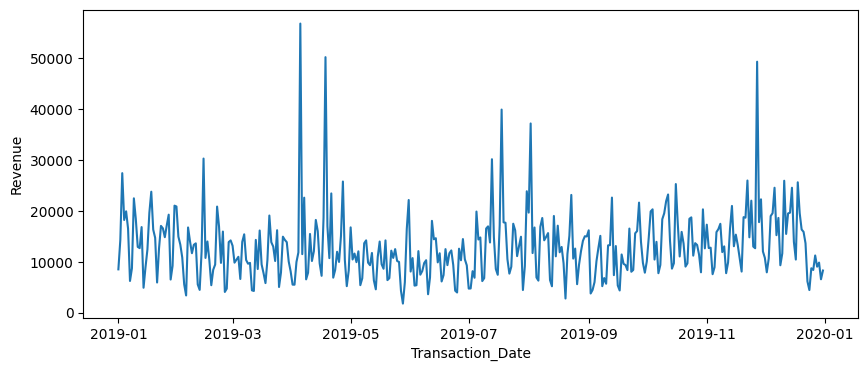

In [ ]:
sales = sales_with_revenue.copy()
sales_trends = sales.groupby('Transaction_Date')['Revenue'].sum().reset_index()
fig = plt.figure(figsize=(10,4))
sns.lineplot(sales_trends,x='Transaction_Date',y='Revenue')


In [ ]:
max_day = sales_trends.loc[sales_trends['Revenue'].idxmax()]
min_day = sales_trends.loc[sales_trends['Revenue'].idxmin()]

print("Highest sales day:", max_day['Transaction_Date'], "with", max_day['Revenue'])
print("Lowest sales day:", min_day['Transaction_Date'], "with", min_day['Revenue'])

Highest sales day: 2019-04-05 00:00:00 with 56753.00369
Lowest sales day: 2019-05-28 00:00:00 with 1767.15072


**Strategies to boost sales on slower days:**

*   **Run targeted promotions and discounts:** Offer special deals or discounts specifically on days with historically lower sales to incentivize purchases.
*   **Increase marketing efforts:** Allocate more marketing resources to promote products or services on low-performing days. This could involve targeted social media campaigns, email marketing, or online advertising.
*   **Offer free shipping or other incentives:** Waive shipping fees or provide other value-added incentives to encourage customers to buy on slower days.
*   **Analyze customer behavior:** Understand why customers are less likely to purchase on certain days. This could involve analyzing website traffic patterns, customer demographics, or external factors that influence purchasing decisions. Use these insights to tailor your strategies.

# Ignore the blocks below, Case Study ends above

In [ ]:
# Replace 'YourNotebookName.ipynb' with your actual notebook name
#!jupyter nbconvert --to html "/content/Untitled0.ipynb"



In [ ]:
# Download the HTML file
#from google.colab import files
#files.download("Untitled0.html")


In [ ]:
#from google.colab import files

# Download the notebook as HTML
#!jupyter nbconvert --to html /content/*.ipynb
#files.download("/content/*.html")  # You may need to replace * with actual name


In [ ]:
# Download the HTML file
#from google.colab import files
#files.download("Untitled0.html")

In [ ]:
# Replace 'YourNotebookName.ipynb' with your actual notebook name
#!jupyter nbconvert --to html "/content/Untitled0.ipynb"


In [ ]:
# Download the HTML file
#from google.colab import files
#files.download("Untitled0.html")

In [ ]:
# Replace 'YourNotebookName.ipynb' with your actual notebook name